In [31]:
py.importlib.import_module('numpy');
py.importlib.import_module('pandas');
py.pandas.set_option('display.max_rows', py.None)
py.pandas.set_option('display.max_columns', py.None)

iterations =
    12



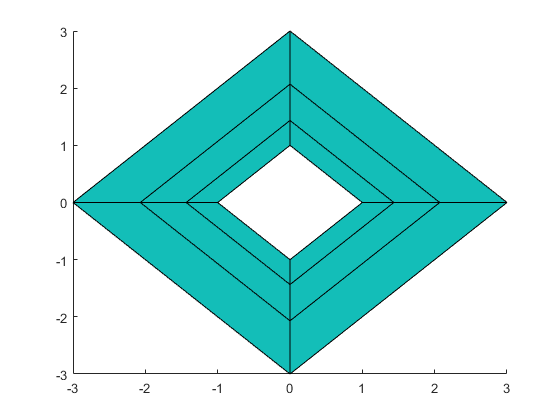

In [32]:
N1 = 5;
N2 = 4;
[X,Y] = elliptic_polar(5,4,1.1,1e-6,10000,'roid');
L = 2; %number of karp expansions
format compact

In [33]:
size = (N1 - 1)*(N2-1 + 2*L);
A = spalloc(size,size,(5*N1 - 16)*N2 + 18*L*N2);
rhs = zeros(N1-1,N2-1 + 2*L);
k = 2*pi;
uinc = @(x) exp(1j*k*x);
uinc_hat = @(xi) uinc(X(xi));
uinc_eval = uinc(X);

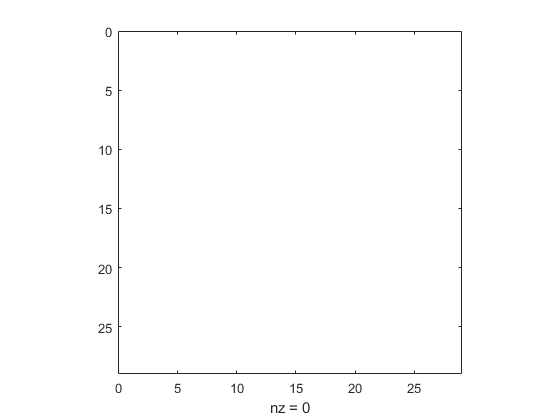

In [34]:
spy(A)

This is the part where helmholts solved on generalize curvillinear coordinates. The discretization I derived is here
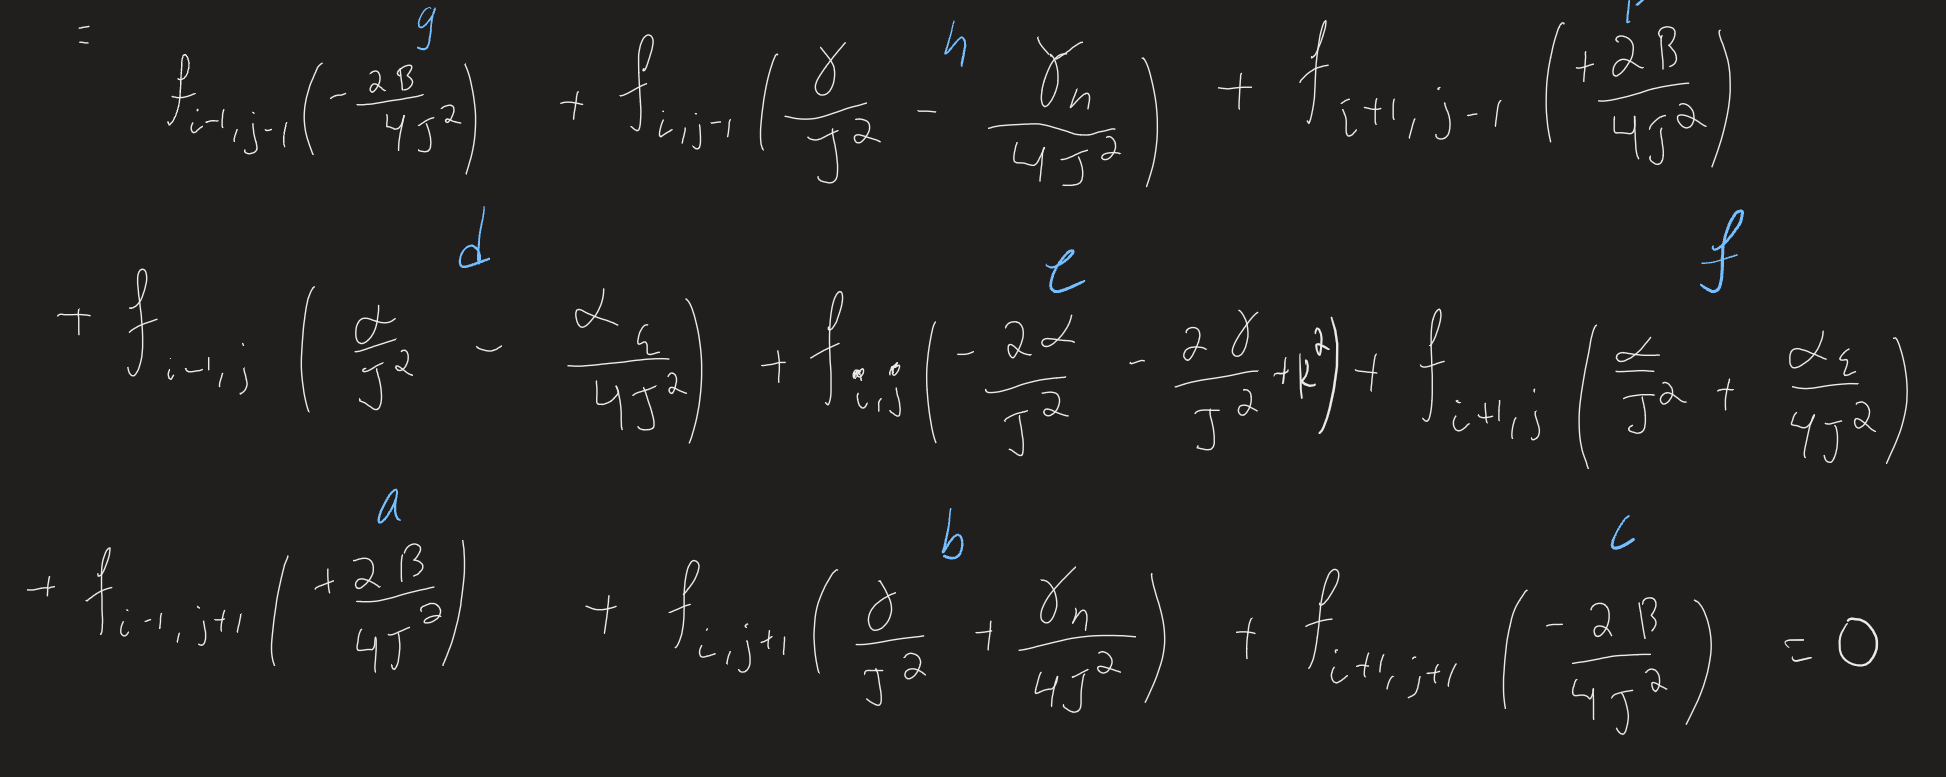

In [35]:
for i=1:N1-1

    for j=1:N2-2
        spot = (N1-1)*(j-1) + i;
        if j == 1
            A(spot,spot) = 1;
            rhs(i,j) =  -uinc_hat(i); % inner boundary condition
            
        elseif i == 1
            xe = 0.5*(X(i+1,j) - X(N1-1,j));
            xn = 0.5*(X(i,j+1) - X(i,j-1));
            ye = 0.5*(Y(i+1,j) - Y(N1-1,j));
            yn = 0.5*(Y(i,j+1) - Y(i,j-1));

            xne = 0.25*(X(N1-1,j-1)+X(i+1,j+1)-X(i+1,j-1)-X(N1-1,j+1));
            yne = 0.25*(Y(N1-1,j-1)+Y(i+1,j+1)-Y(i+1,j-1)-Y(N1-1,j+1));
            
            alpha = xn^2 + yn^2;
            beta = xe*xn + ye*yn;
            gamma = xe^2 + ye^2;
            J = xe*yn - xn*ye;
            ae = 2*(xn*xne + yn*yne);
            gn = 2*(xe*xne + ye*yne);
            
            A(spot,spot - 1) = -0.5*beta/(J^2);
            A(spot,spot - (N1-1)) = gamma/(J^2) - gn/(4*J^2); 
            A(spot,spot - (N1-1) + 1) = 0.5*beta/(J^2);

            A(spot,spot-1 + N2) = alpha/(J^2) - ae/(4*J^2); 
            A(spot,spot) = k^2 -2*(gamma/(J^2)) - 2*alpha/(J^2);
            A(spot,spot+1) = alpha/(J^2) + ae/(4*J^2);   

            A(spot,spot + 2*(N1-1) - 1) = 0.5*beta/(J^2);
            A(spot,spot + (N1-1)) = gamma/(J^2) + gn/(4*J^2); 
            A(spot,spot + (N1-1) + 1) = -0.5*beta/(J^2);
            
        elseif i == N1-1 
            
            xe = 0.5*(X(1,j) - X(i-1,j));
            xn = 0.5*(X(i,j+1) - X(i,j-1));
            ye = 0.5*(Y(1,j) - Y(i-1,j));
            yn = 0.5*(Y(i,j+1) - Y(i,j-1));

            xne = 0.25*(X(i-1,j-1)+X(1,j+1)-X(1,j-1)-X(i-1,j+1));
            yne = 0.25*(Y(i-1,j-1)+Y(1,j+1)-Y(1,j-1)-Y(i-1,j+1));

            alpha = xn^2 + yn^2;
            beta = xe*xn + ye*yn;
            gamma = xe^2 + ye^2;
            J = xe*yn - xn*ye;
            ae = 2*(xn*xne + yn*yne);
            gn = 2*(xe*xne + ye*yne);


            A(spot,spot - (N1-1) - 1) = -2*beta/(4*J^2);
            A(spot,spot - (N1-1)) = gamma/(J^2) - gn/(4*J^2);
            A(spot,spot - 2*(N1-1) + 1) = 2*beta/(4*J^2);

            A(spot,spot-1) = alpha/(J^2) - ae/(4*J^2); 
            A(spot,spot) = k^2 -2*(gamma/(J^2)) - 2*alpha/(J^2);
            A(spot,spot -(N1-1) +1) = alpha/(J^2) + ae/(4*J^2);

            A(spot,spot + (N1-1) - 1) = 2*beta/(4*J^2);
            A(spot,spot + (N1-1)) = gamma/(J^2) + gn/(4*J^2);
            A(spot,spot + 1) = -2*beta/(4*J^2);
        
        
        
        
        else
            xe = 0.5*(X(i+1,j) - X(i-1,j));
            xn = 0.5*(X(i,j+1) - X(i,j-1));
            ye = 0.5*(Y(i+1,j) - Y(i-1,j));
            yn = 0.5*(Y(i,j+1) - Y(i,j-1));

            xne = 0.25*(X(i-1,j-1)+X(i+1,j+1)-X(i+1,j-1)-X(i-1,j+1));
            yne = 0.25*(Y(i-1,j-1)+Y(i+1,j+1)-Y(i+1,j-1)-Y(i-1,j+1));

            alpha = xn^2 + yn^2;
            beta = xe*xn + ye*yn;
            gamma = xe^2 + ye^2;
            J = xe*yn - xn*ye;
            ae = 2*(xn*xne + yn*yne); 
            gn = 2*(xe*xne + ye*yne); 


            A(spot,spot - (N1-1) - 1) = -2*beta/(4*J^2);
            A(spot,spot - (N1-1)) = gamma/(J^2) - gn/(4*J^2);
            A(spot,spot - (N1-1) + 1) = 2*beta/(4*J^2);

            A(spot,spot-1) = alpha/(J^2) - ae/(4*J^2); 
            A(spot,spot) = k^2 -2*(gamma/(J^2)) - 2*alpha/(J^2);
            A(spot,spot+1) = alpha/(J^2) + ae/(4*J^2);

            A(spot,spot + (N1-1) - 1) = 2*beta/(4*J^2);
            A(spot,spot + (N1-1)) = gamma/(J^2) + gn/(4*J^2);
            A(spot,spot + (N1-1) + 1) = -2*beta/(4*J^2);
        
        end
    end
end

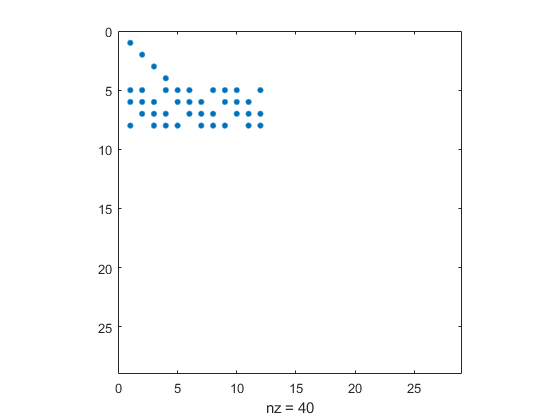

In [36]:
spy(A)

In [44]:
full(A(N1:2*(N1-1),1:3*N2))

ans =
    2.8443    0.0000         0   -0.0000   31.5162    0.4855         0    0.4855    4.1470   -0.0000         0    0.0000
   -0.0000    2.8443    0.0000         0    0.4855   31.5162    0.4855         0    0.0000    4.1470   -0.0000         0
         0    0.0000    2.8443   -0.0000         0    0.4855   31.5162    0.4855         0   -0.0000    4.1470    0.0000
   -0.0000         0    0.0000    2.8443    0.4855         0    0.4855   31.5162    0.0000         0   -0.0000    4.1470



My next for loop adds the equations for the N2-1 radial level. This includes that karp expansion terms. Since we are so close to the outer boundary, I am now treating the grid like it is polar. 
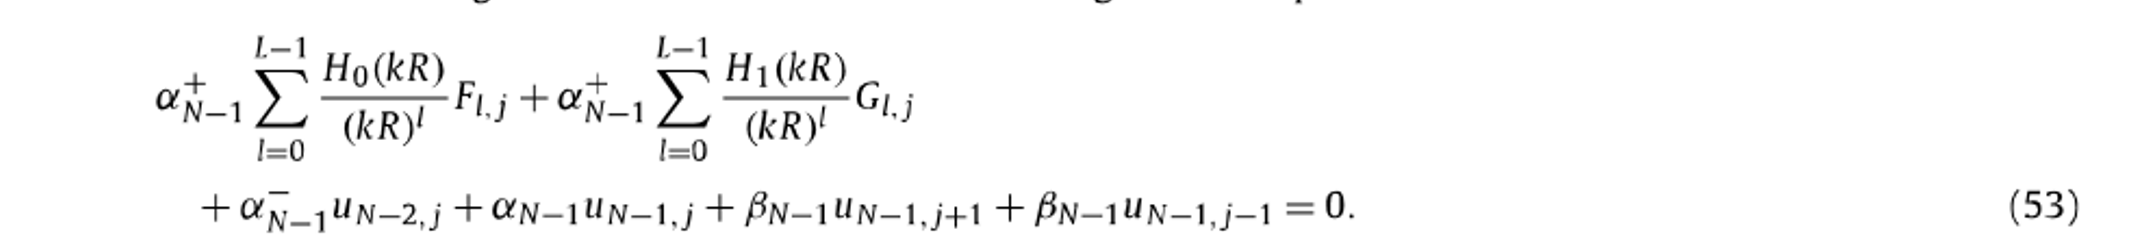

In [42]:
r = mean(sqrt(X(:,N2-1).^2 + Y(:,N2-1).^2));
R = mean(sqrt(X(:,N2).^2 + Y(:,N2).^2));
dr = R - r;
dt = 2*pi/(N1-1);
aminus = 1/dr^2 - 1/(2*dr*r);
aplus = 1/(dr^2) + 1/(2*dr*r);
a = k^2 - (2/(dr^2)) - (2/(dt*r)^2);
B = 1/(dt*r)^2;


j = N2-1;
for i=1:N1-1
    spot = (N1-1)*(j-1) + i;
    base = spot + N1 - 1;
    A(spot,spot - (N1-1)) = aminus;
    A(spot,spot) = a;
    if i == 1
   
        A(spot,spot+1) = B;
        A(spot,spot+(N1-1) -1) = B;
    
    elseif i == N1-1
        
        A(spot,spot - (N1-1) +1) = B;
        A(spot,spot - 1) = B;
        
    else
             
        A(spot,spot - 1) = B;
        A(spot,spot + 1) = B;        
    end
    
    for q =0:L-1
        A(spot,base + 2*(N1 -1)*q) = aplus*besselh(0,k*R)/((k*R)^q);
        A(spot,base + N1 - 1 + 2*(N1 -1)*q) = aplus*besselh(1,k*R)/((k*R)^q);
    end
    
end

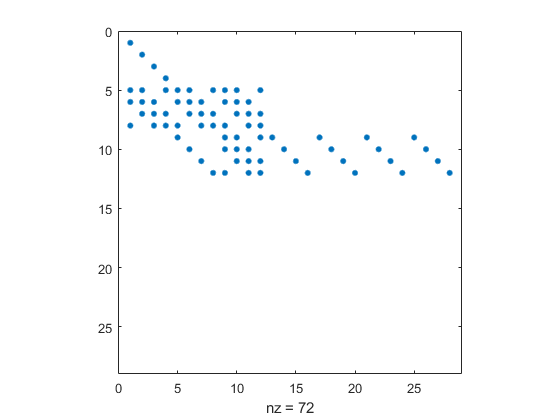

In [43]:
spy(A)

In [52]:
full(A((N1-1)*2 + 1:3*(N1-1),N2+1:size))


ans =
  Columns 1 through 8
   0.8958 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i  36.9782 + 0.0000i   0.0946 + 0.0000i   0.0000 + 0.0000i   0.0946 + 0.0000i
   0.0000 + 0.0000i   0.8958 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0946 + 0.0000i  36.9782 + 0.0000i   0.0946 + 0.0000i   0.0000 + 0.0000i
   0.0000 + 0.0000i   0.0000 + 0.0000i   0.8958 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0946 + 0.0000i  36.9782 + 0.0000i   0.0946 + 0.0000i
   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.8958 + 0.0000i   0.0946 + 0.0000i   0.0000 + 0.0000i   0.0946 + 0.0000i  36.9782 + 0.0000i
  Columns 9 through 16
   0.1826 - 0.1851i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i  -0.1803 - 0.1876i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i
   0.0000 + 0.0000i   0.1826 - 0.1851i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i  -0.1803 - 0.1876i   0.0000 + 0.0000i   0.0000 + 0.0000i
   0.0000 + 0.0000i   0.0000 + 

Now, using the continuity of the first radial derivative, we get these equations that fill the j=N2 level
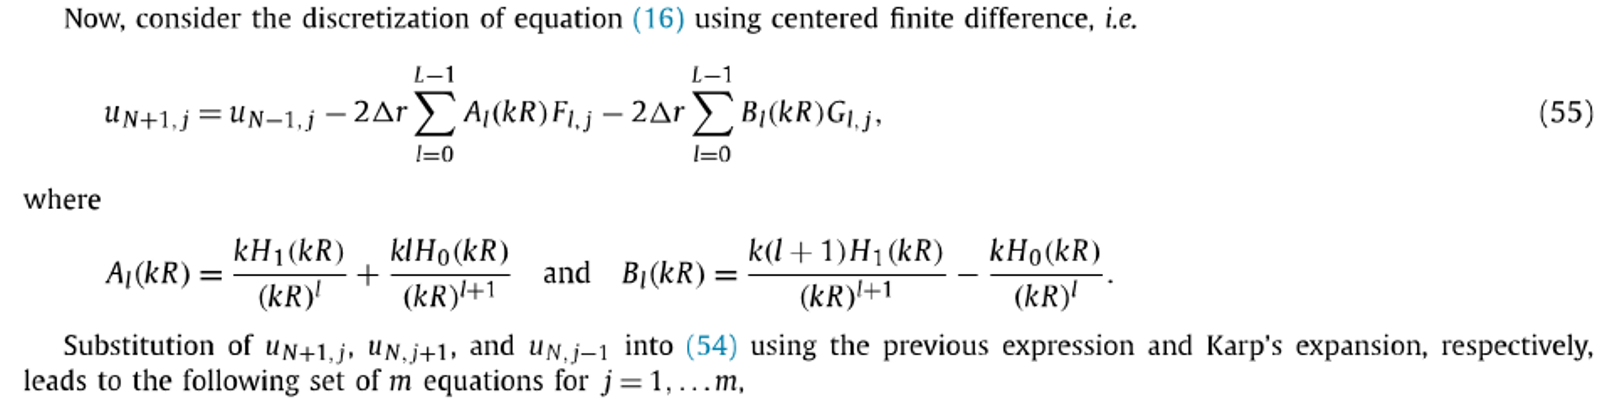

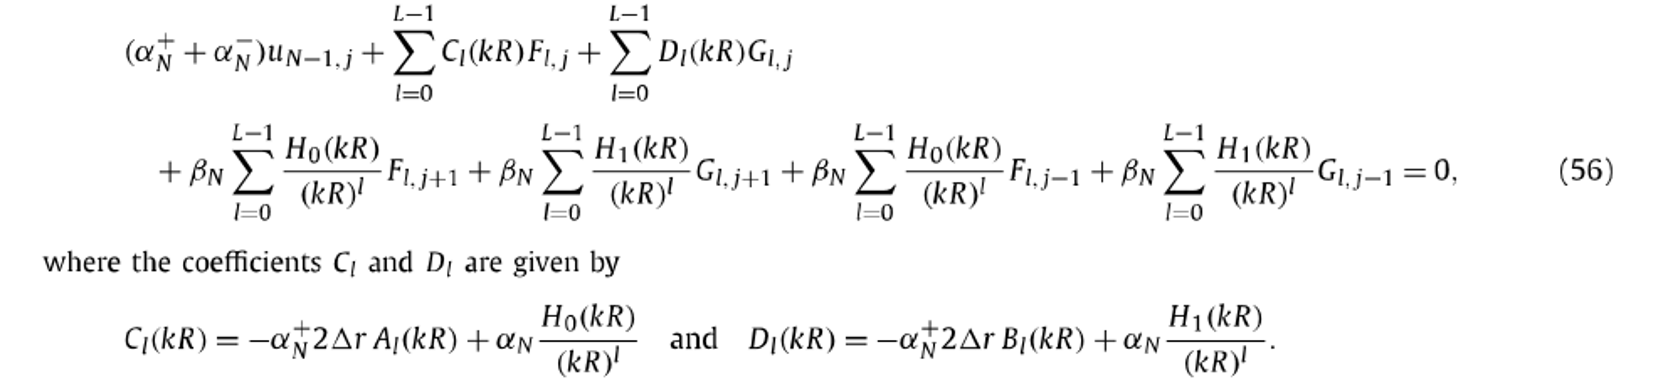

In [53]:
j = N2;

aminus = (1/dr^2) - 1/(2*dr*R);
aplus = 1/(dr^2) + 1/(2*dr*R);
a = k^2 - (2/(dr^2)) - (2/(dt*R)^2);
B = 1/(dt*R)^2;



for i=1:N1-1
    spot = (N1-1)*(j-1) + i;
    base = spot;
    A(spot,spot -(N1-1)) = aminus+aplus;
    
    for q=0:L-1
        Al = k*besselh(1,k*R)/((k*R)^q) + k*q*besselh(0,k*R)/((k*R)^(q+1));
        Bl = k*(q+1)*besselh(1,k*R)/((k*R)^(q+1)) - k*besselh(0,k*R)/((k*R)^q);
        Cl = -aplus*2*dr*Al + a*besselh(0,k*R)/((k*R)^q);
        Dl = -aplus*2*dr*Bl + a*besselh(1,k*R)/((k*R)^q);
        
        A(spot,base + 2*(N1 -1)*q) = Cl;
        A(spot,base + N1 - 1 + 2*(N1 -1)*q) = Dl;
        
        if i == 1
            A(spot,base + 1 + 2*(N1 -1)*q) = B*besselh(0,k*R)/((k*R)^q);
            A(spot,base + (N1-1) - 1 + 2*(N1 -1)*q) = B*besselh(0,k*R)/((k*R)^q);
            A(spot,base + 1 + (N1-1) + 2*(N1 -1)*q) = B*besselh(1,k*R)/((k*R)^q);
            A(spot,base + (N1-1) - 1 + (N1 - 1) + 2*(N1 -1)*q) = B*besselh(1,k*R)/((k*R)^q);
        elseif i == N1-1
            A(spot,base - (N1 - 1) + 1 + 2*(N1 -1)*q) = B*besselh(0,k*R)/((k*R)^q);
            A(spot,base - 1 + 2*(N1 -1)*q) = B*besselh(0,k*R)/(k*R)^(q-1);
            A(spot,base - (N1 - 1) + 1 + (N1-1) + 2*(N1 -1)*q) = B*besselh(1,k*R)/((k*R)^q);
            A(spot,base - 1 + (N1-1) + 2*(N1 -1)*q) = B*besselh(1,k*R)/((k*R)^q);
        else
            A(spot,base + 1 + 2*(N1 -1)*q) = B*besselh(0,k*R)/((k*R)^q);
            A(spot,base - 1 + 2*(N1 -1)*q) = B*besselh(0,k*R)/((k*R)^q);
            A(spot,base + 1 + (N1-1) + 2*(N1 -1)*q) = B*besselh(1,k*R)/((k*R)^q);
            A(spot,base - 1 + (N1-1) + 2*(N1 -1)*q) = B*besselh(1,k*R)/((k*R)^q);
        end
    end
end

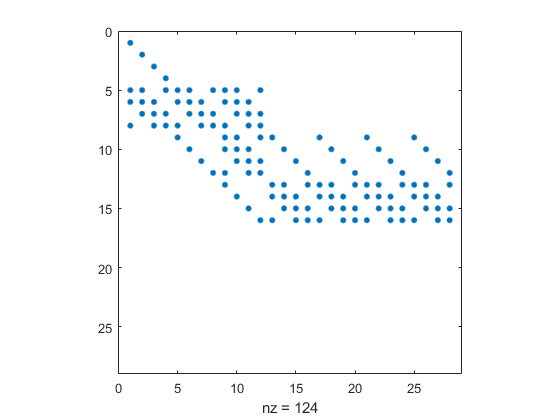

In [54]:
spy(A)

In [57]:
full(A((N1-1)*3 + 1:4*(N1-1),2*N2+1:size))

ans =
  Columns 1 through 8
   2.3110 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   6.7732 - 2.7806i   0.0058 - 0.0059i   0.0000 + 0.0000i   0.0058 - 0.0059i
   0.0000 + 0.0000i   2.3110 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0058 - 0.0059i   6.7732 - 2.7806i   0.0058 - 0.0059i   0.0000 + 0.0000i
   0.0000 + 0.0000i   0.0000 + 0.0000i   2.3110 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0058 - 0.0059i   6.7732 - 2.7806i   0.0058 - 0.0059i
   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   2.3110 + 0.0000i   0.0058 - 0.0059i   0.0000 + 0.0000i   0.1096 - 0.1110i   6.7732 - 2.7806i
  Columns 9 through 16
  -2.6048 - 6.8464i  -0.0057 - 0.0060i   0.0000 + 0.0000i  -0.0057 - 0.0060i   0.3537 - 0.1418i   0.0003 - 0.0003i   0.0000 + 0.0000i   0.0003 - 0.0003i
  -0.0057 - 0.0060i  -2.6048 - 6.8464i  -0.0057 - 0.0060i   0.0000 + 0.0000i   0.0003 - 0.0003i   0.3537 - 0.1418i   0.0003 - 0.0003i   0.0000 + 0.0000i
   0.0000 + 0.0000i  -0.0057 - 

from the continuity of the second radial derivative at the artificial boundary, we get these equations
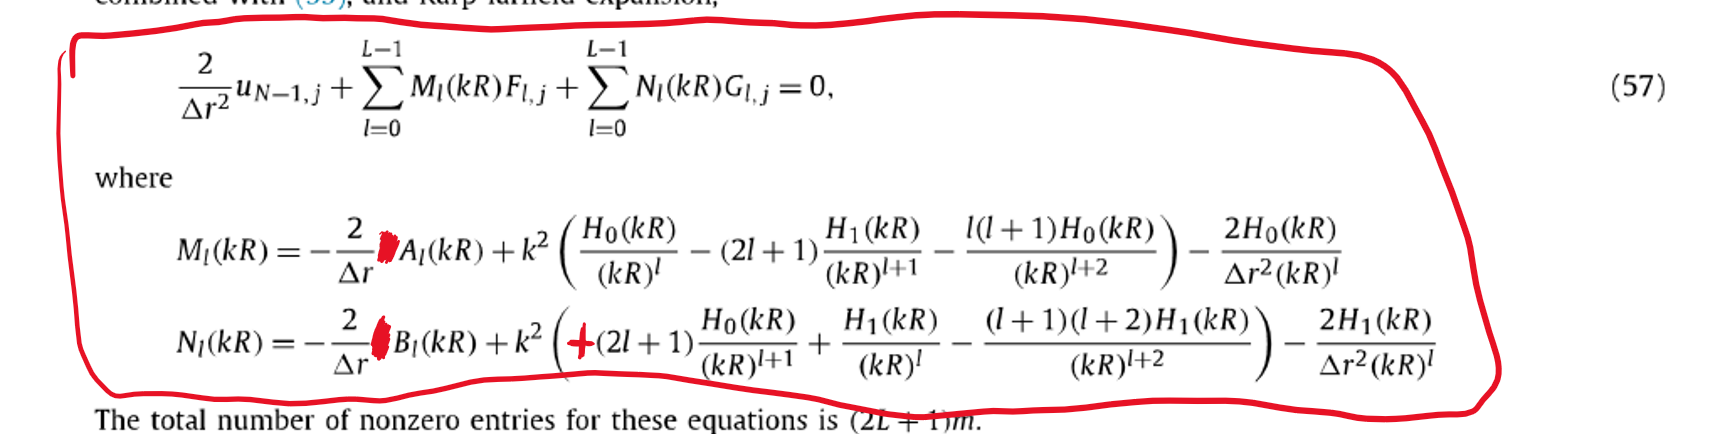

The red marks are the typos that Dr. Villamizar told me about, but I believe there is another typo in the Ml constant and it should actually be. 
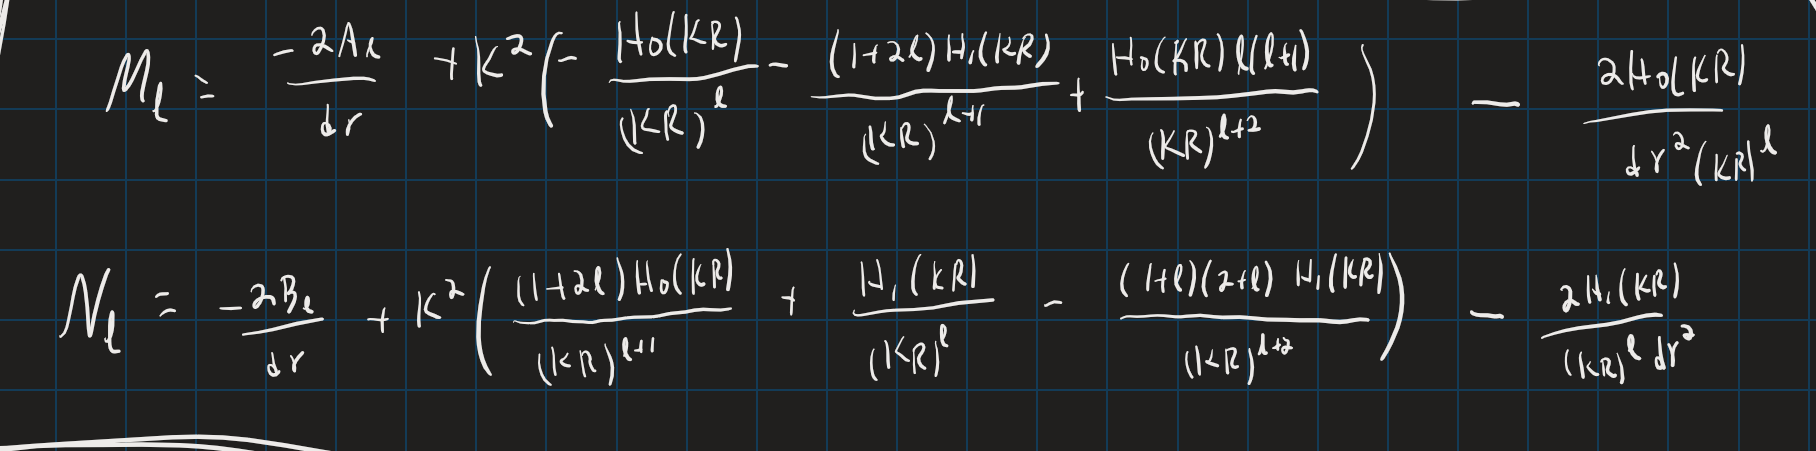

In [58]:
j = N2 + 1;
for i=1:N1-1
    spot = (N1-1)*(j-1) + i;
    base = spot - (N1-1);
    A(spot,spot -2*(N1-1)) = 2/(dr^2);
    
    for q=0:L-1
        Al = k*besselh(1,k*R)/((k*R)^q) + k*q*besselh(0,k*R)/((k*R)^(q+1));
        Bl = k*(q+1)*besselh(1,k*R)/((k*R)^(q+1)) - k*besselh(0,k*R)/((k*R)^q);
        Ml = -2*Al/dr + k^2 * (-besselh(0,k*R)/((k*R)^q) - (2*q + 1)*besselh(1,k*R)/((k*R)^(q+1)) + (q+1)*q*besselh(0,k*R)/((k*R)^(q+2))) - 2*besselh(0,k*R)/(dr^2 * (k*R)^(q));
        Nl = -2*Bl/dr + k^2 * ((2*q + 1)*besselh(0,k*R)/((k*R)^(q+1)) + besselh(1,k*R)/((k*R)^q) - (q+1)*(q+2)*besselh(1,k*R)/(k*R)^(q+2)) - 2*besselh(1,k*R)/(dr^2 * (k*R)^q);
        A(spot,base + 2*(N1 -1)*q) = Ml;
        A(spot,base + N1 - 1 + 2*(N1 -1)*q) = Nl;
       
  
    end
end

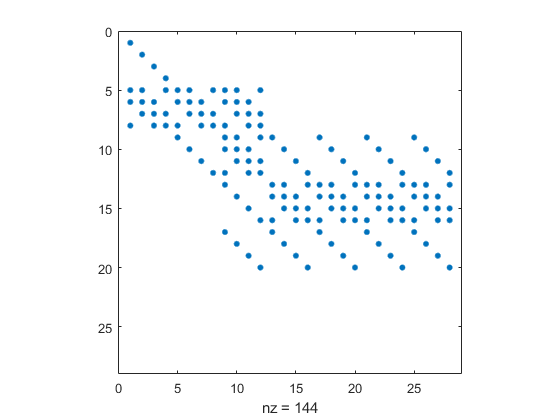

In [59]:
spy(A)

In [60]:
full(A((N1-1)*4 + 1:5*(N1-1),2*N2+1:size))

ans =
  Columns 1 through 8
   2.3110 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i  -3.4056 + 7.5339i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i
   0.0000 + 0.0000i   2.3110 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i  -3.4056 + 7.5339i   0.0000 + 0.0000i   0.0000 + 0.0000i
   0.0000 + 0.0000i   0.0000 + 0.0000i   2.3110 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i  -3.4056 + 7.5339i   0.0000 + 0.0000i
   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   2.3110 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i  -3.4056 + 7.5339i
  Columns 9 through 16
  -2.6021 - 6.8436i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i  -0.1557 + 0.4326i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i
   0.0000 + 0.0000i  -2.6021 - 6.8436i   0.0000 + 0.0000i   0.0000 + 0.0000i   0.0000 + 0.0000i  -0.1557 + 0.4326i   0.0000 + 0.0000i   0.0000 + 0.0000i
   0.0000 + 0.0000i   0.0000 + 

the last of the equations are given by the recurrence relations of the karp expansions.
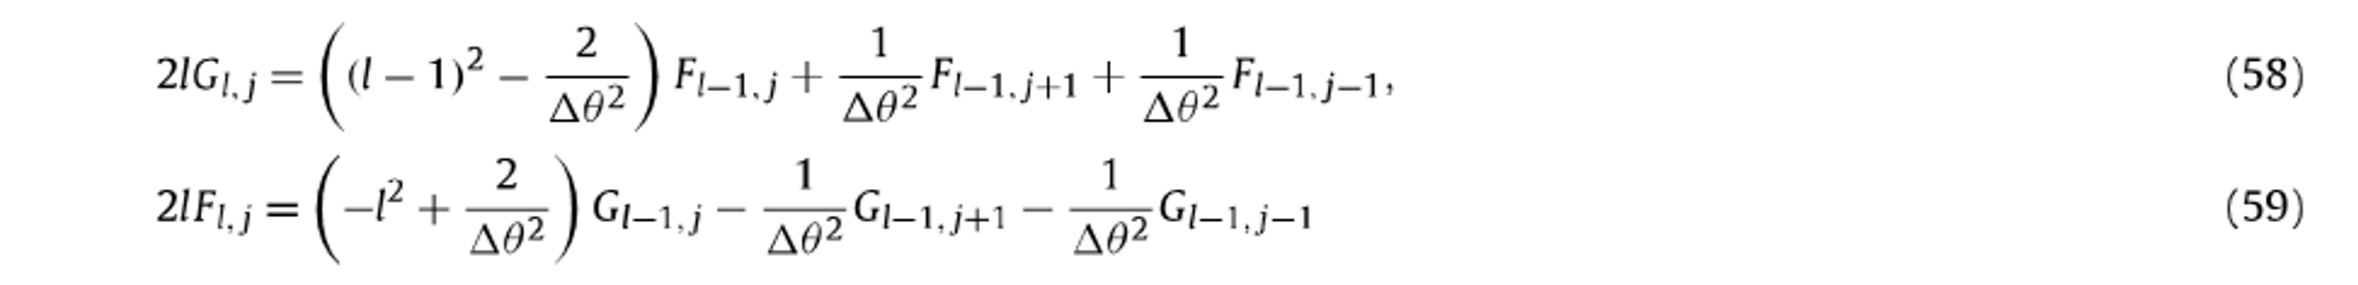

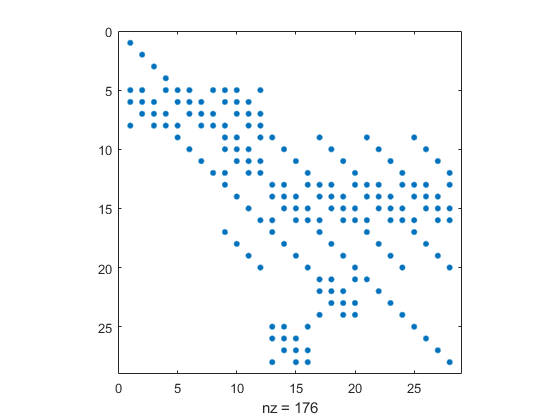

In [61]:
for l=1:L-1
    j = N2 + 2 + 2*(l-1);
    P = 1/dt^2;
    Q1 = ((l-1)^2 - 2/dt^2);
    Q2 = (-l^2 + 2/dt^2);
    
    for i=1:N1-1
        spot = (N1-1)*(j-1) + i;
        base = spot - (N1-1);
        A(spot,spot) = 2*l;
        A(spot,base) = -Q2;
        if i == 1
            A(spot,base + 1) = P;
            A(spot,base + (N1-1) -1) = P;
        elseif i ==N1-1
            A(spot,base -1) = P;
            A(spot,base - (N1-1) + 1) = P;
        else
            A(spot,base -1) = P;
            A(spot,base+1) = P;
        end
    end
    
    j = N2 + 3 + 2*(l-1);
    for i=1:N1-1
        spot = (N1-1)*(j-1) + i;
        base = spot - 3*(N1-1);
        A(spot,spot) = 2*l;
        A(spot,base) = -Q1;
        if i == 1
            A(spot,base + 1) = -P;
            A(spot,base + (N1-1) -1) = -P;
        elseif i ==N1-1
            A(spot,base -1) = -P;
            A(spot,base - (N1-1) + 1) = -P;
        else
            A(spot,base -1) = -P;
            A(spot,base+1) = -P;
        end
    end 
end

spy(A)


In [62]:
full(A((N1-1)*5 + 1:size,3*N2+1:size))

ans =
         0         0         0         0    0.1894    0.4053         0    0.4053    2.0000         0         0         0         0         0         0         0
         0         0         0         0    0.4053    0.1894    0.4053         0         0    2.0000         0         0         0         0         0         0
         0         0         0         0         0    0.4053    0.1894    0.4053         0         0    2.0000         0         0         0         0         0
         0         0         0         0    0.4053         0    0.4053    0.1894         0         0         0    2.0000         0         0         0         0
    0.8106   -0.4053         0   -0.4053         0         0         0         0         0         0         0         0    2.0000         0         0         0
   -0.4053    0.8106   -0.4053         0         0         0         0         0         0         0         0         0         0    2.0000         0         0
         0   -0.4053    0.81